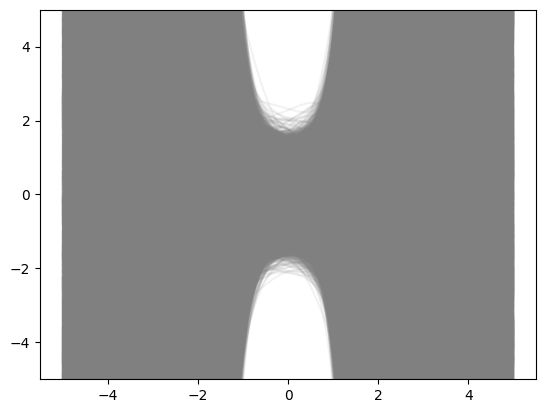

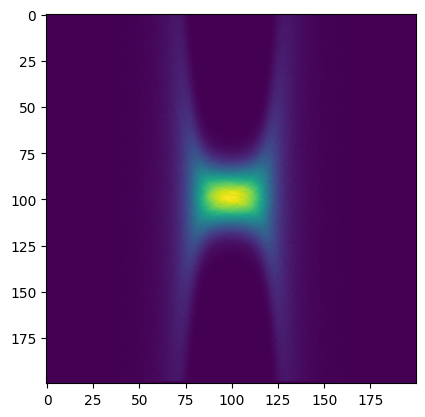

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import default_rng as rng

sample_size = 200
prior_sample_size = int(1e5)
poly_deg = 5

K = poly_deg + 1

# Specifying the prior distribution p(θ) = N(m_0, S_0)
m_0 = np.zeros(K)
S_0 = 0.25 * np.eye(K)

# Take random sample from prior distribution
prior_sample = rng().multivariate_normal(m_0, S_0, prior_sample_size)

# Build design matrix
examples = np.linspace(-5, 5, sample_size)
Φ = [[x**i for i in range(K)] for x in examples]

# Computing and plotting function samples
fig, ax = plt.subplots()
ax.set_ylim([-5,5])

# For the heat map
functional_res = 200
heat_map = np.zeros((functional_res, sample_size))
for i, θ_i in enumerate(prior_sample):
    f_i = Φ@θ_i
    ax.plot(examples, f_i, color='grey', alpha=0.1)
    for j, val in enumerate(f_i):
        # j is column idx in heat map
        
        # k is row idx in heat map
        if val > 5 or val < -5:
            continue
        
        k = int(((val + 5) / 10) * (functional_res - 1))
        assert type(k) is int 
        assert k < functional_res, f"{k}"
        assert k >= 0, f"{k}"
        
        heat_map[k,j] += 1

plt.show()
plt.figure()
plt.imshow(heat_map)

#ax.plot(examples, f_i, color='grey', alpha=0.1)

## Plotting Functional Confidence Intervals

*Idea:* Draw samples from functional distribution. We can do this because there is a normal distribution at each point along the domain.

[]

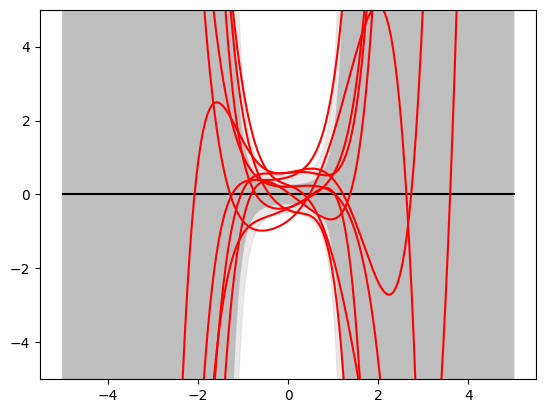

In [42]:
# Didn't end up needing this function
def noise_free_functional_sample(x, deg, N, μ_prior, Σ_prior):
    ϕ = np.array([x**i for i in range(deg+1)])
    return rng().normal(ϕ@μ_prior, ϕ@Σ_prior@ϕ, N)

means = []
upper_sigma = []
upper_two_sigma = []
lower_sigma = []
lower_two_sigma = []
for i, x in enumerate(examples):
    ϕ = np.array([x**i for i in range(poly_deg+1)])
    sigma = ϕ@S_0@ϕ
    means.append(ϕ@m_0)
    upper_sigma.append(means[i] + sigma)
    upper_two_sigma.append(means[i] + 2*sigma)
    lower_sigma.append(means[i] - sigma)
    lower_two_sigma.append(means[i] - 2*sigma)
    
fig, ax = plt.subplots()
ax.set_ylim([-5,5])
ax.fill_between(examples, lower_sigma, upper_sigma, color='darkgrey')
ax.fill_between(examples, lower_two_sigma, upper_two_sigma, color='lightgrey', alpha=0.5)
ax.plot(examples, means, color='black')

prior_sample_size = 10

# Take random sample from prior distribution
prior_sample = rng().multivariate_normal(m_0, S_0, prior_sample_size)
for i, θ_i in enumerate(prior_sample):
    f_i = Φ@θ_i
    ax.plot(examples, f_i, color='red')

plt.plot()